In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
iris=pd.read_csv("C:/Users/trax/Downloads/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [5]:
# Copy of iris dataset
iris_data= iris.drop(['Id'],axis=1)
iris_data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [6]:
# Descriptive statistics 
df_summary=iris_data.describe()
df_summary

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.
It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.


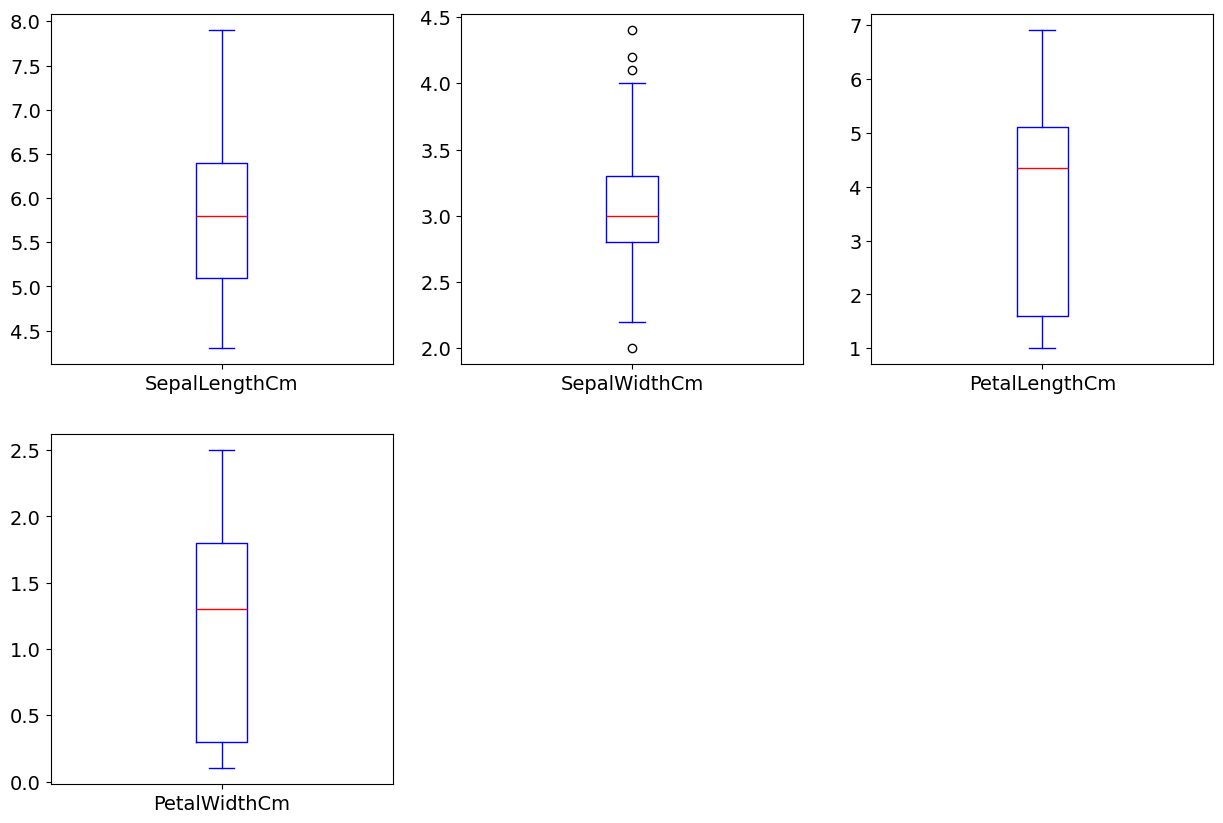

In [7]:
boxplot=iris_data.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, colormap='bwr', figsize=(15,10))

print('From the boxplot, it is visible that only sepal width is having the outlier, whereas sepallength, petallength, petalwidth having datapoints within min and maxrange.')
print('It is visible that values in sepallength and sepalwidth are tightly distributed and IQ range is small, whereas in petallength and petalwidth the values are distibuted widely,so IQ range are high.')

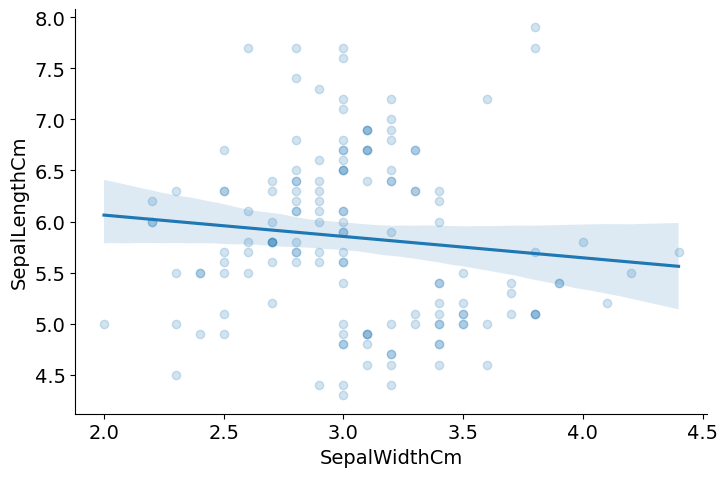

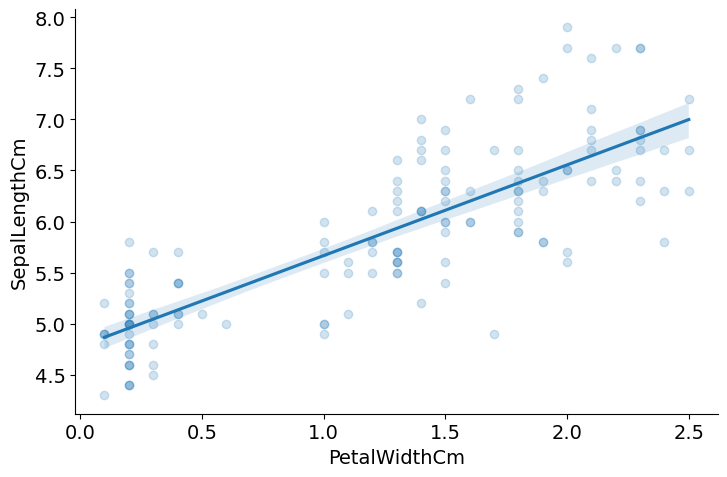

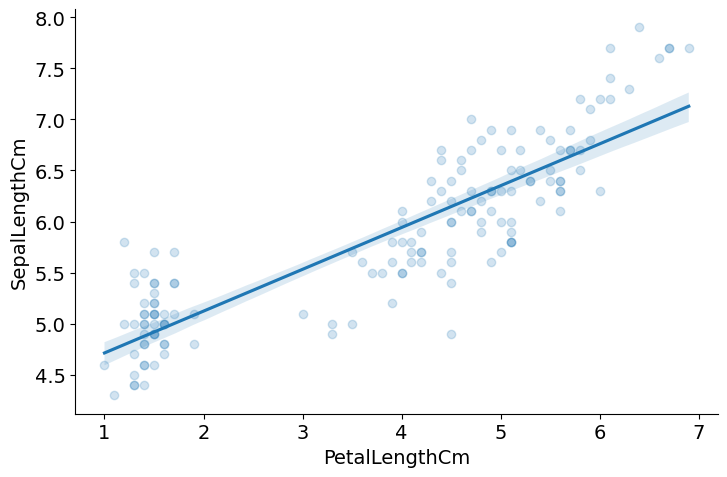

In [9]:
# Scatterplot with best fit line to explore relation b/w sepallength(dependent)& sepalwidth,petalwidth,petallengh(Independent)

a=sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
b=sns.lmplot(x='PetalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
c=sns.lmplot(x='PetalLengthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})  

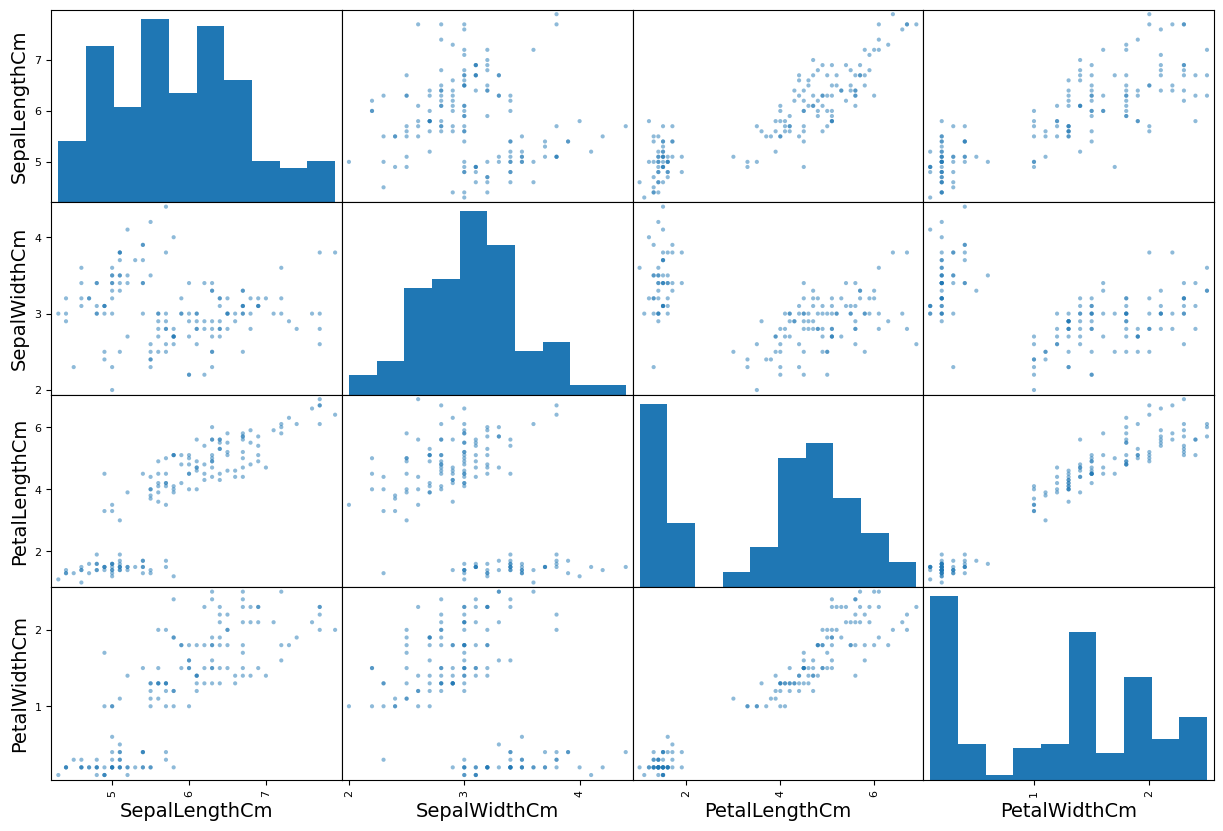

In [10]:
#Combine scatterplot to explore relation b/w sepallength, sepalwidth, petalwidth, petallength

scatter=pd.plotting.scatter_matrix(iris_data,figsize=(15,10))

In [11]:
#Checking the relationship between Sepal width and Sepal length
input_cols = ['SepalWidthCm']
output_variable = ['SepalLengthCm']
X = iris_data[input_cols]
Y = iris_data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print('Sepal.length = -0.2088*Sepal.Width + 6.481')
print('\n')
print('Holding constant fixed, a 1 centimeter increase in sepalwidth lead to a decrease in Sepalength by 0.208centimeter')

[6.48122321]
[[-0.20887029]]


Sepal.length = -0.2088*Sepal.Width + 6.481


Holding constant fixed, a 1 centimeter increase in sepalwidth lead to a decrease in Sepalength by 0.208centimeter


In [12]:
#Checking the relationship between Petal length and Sepal length
input_cols = ['PetalLengthCm']
output_variable = ['SepalLengthCm']
X = iris_data[input_cols]
Y = iris_data[output_variable]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.intercept_)
print (linreg.coef_)
print('\n')
print('Sepal.length = 0.409*Petal.length + 4.305')
print('\n')
print('Holding constant fixed, a 1 centimeter increase in petallength lead to a increase in Sepalength by 0.409 centimeter')


[4.30556546]
[[0.4091259]]


Sepal.length = 0.409*Petal.length + 4.305


Holding constant fixed, a 1 centimeter increase in petallength lead to a increase in Sepalength by 0.409 centimeter


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,0
1,2,4.90,3.00,1.40,0.20,0
2,3,4.70,3.20,1.30,0.20,0
3,4,4.60,3.10,1.50,0.20,0
4,5,5.00,3.60,1.40,0.20,0
...,...,...,...,...,...,...
95,96,5.70,3.00,4.20,1.20,1
96,97,5.70,2.90,4.20,1.30,1
97,98,6.20,2.90,4.30,1.30,1
98,99,5.10,2.50,3.00,1.10,1


In [16]:
from sklearn.model_selection import train_test_split
X = iris.drop(columns = ['Species'])
Y = iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\trax\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print("Accuracy: ", model.score(X_test, Y_test) * 100)

Accuracy:  100.0


In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Lasso regression for classification
lasso_classifier = Lasso(alpha=0.1)
lasso_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lasso_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred.round())
conf_matrix = confusion_matrix(y_test, y_pred.round())

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}") 

Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and fit the ElasticNet model
elastic_net_classifier = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls mix of L1 and L2
elastic_net_classifier.fit(X_train, y_train)

# Make predictions
y_pred = elastic_net_classifier.predict(X_test)

# Since ElasticNet outputs continuous values, we'll round them to get binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print(f"ElasticNet Classifier Accuracy: {accuracy}")
print(f"ElasticNet Confusion Matrix:\n{conf_matrix}")


ElasticNet Classifier Accuracy: 0.6333333333333333
ElasticNet Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]


In [22]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and fit the Ridge Classifier model
ridge_classifier = RidgeClassifier(alpha=0.1)
ridge_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ridge_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Ridge Classifier Accuracy: {accuracy}")
print(f"Ridge Confusion Matrix:\n{conf_matrix}")


Ridge Classifier Accuracy: 0.8666666666666667
Ridge Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  1 10]]
